# Locally weighted linear regression

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
x_file = 'data/weightedX.csv'
y_file = 'data/weightedY.csv'

# Read data
X = pandas.read_csv(x_file, header=None).values
Y = np.squeeze(pandas.read_csv(y_file, header=None).values)

### Linear regression

Text(0, 0.5, 'y')

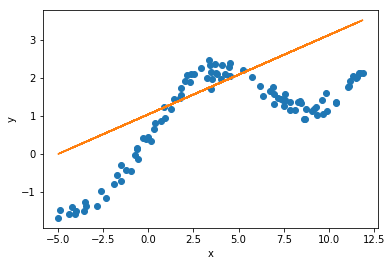

In [3]:
m = X.shape[0]

# initialize theta to zeros
theta = np.zeros(X.shape[1] + 1)
J_theta_old = np.inf

# append intercept term to X
X1 = np.append(X, np.ones(X.shape), axis=1)

# theta according to normal equations
temp = np.diag(1 / np.diag(X1.T @ X1))
theta = temp @ X1.T @ Y

Y_pred = X1 @ theta
plt.plot(X, Y, 'o')
plt.plot(X, Y_pred, label='y (linear regression)')
plt.xlabel('x')
plt.ylabel('y')

### Locally weighted linear regression

In [4]:
tau = 0.8

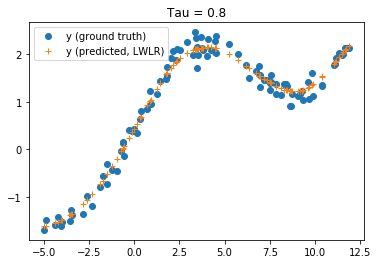

In [7]:
m = X.shape[0]
# append intercept term to X
X0 = X
X1 = np.append(X, np.ones(X.shape), axis=1)
Y_pred = np.zeros(m)

for i in range(m):
    x_i = X1[i]
    diff = (X1[:, 0] - x_i[0])**2
    W = np.diag(np.exp(-diff/(2*(tau**2))))

    temp = np.linalg.inv(X1.T @ W @ X1)
    theta = temp @ X1.T @ W @ Y
    Y_pred[i] = x_i @ theta

plt.plot(X0, Y, 'o', label='y (ground truth)')
plt.plot(X0, Y_pred, '+', label='y (predicted, LWLR)')

plt.title('Tau = {}'.format(tau))
plt.legend()
plt.show()